In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import time
from sklearn.model_selection import GridSearchCV

In [3]:
dataset = pd.read_excel('E:\Datasets for Thesis\DATASET TO USE FOR NEW REC_RATE\Dataset_with_rec_rate.xlsx')

In [4]:
y = dataset['rec_rate']
X = dataset.drop(columns=['cure', 'rec_rate'])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y,  test_size=0.3, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# **Linear Regression**

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [7]:
start_time = time.time()

y_pred = linear_model.predict(X_test)

end_time = time.time()

train_time_lr = end_time - start_time


print(f"Training Time: {train_time_lr}")

Training Time: 0.0030007362365722656


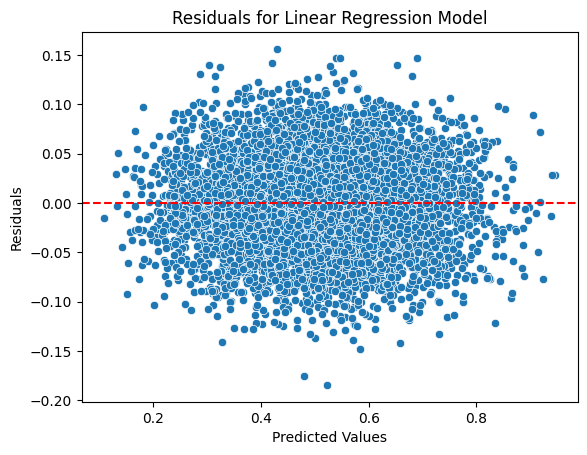

In [37]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title("Residuals for Linear Regression Model")
plt.show()

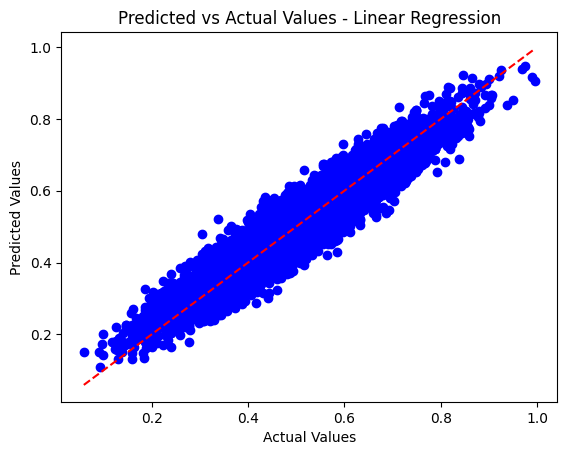

In [38]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Predicted vs Actual Values - Linear Regression")
plt.show()

In [39]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.0018933121706326008
Mean Absolute Error (MAE): 0.034692525390625
R-squared (R2): 0.8974723650449814


In [40]:
print("Intercept:", linear_model.intercept_)
print("Coefficient(s):", linear_model.coef_)

Intercept: 617359744401.416
Coefficient(s): [ 4.04936932e-02  8.37663984e-02  6.61964276e-02  5.62718026e-02
  2.08005639e-02  2.27669672e-02  1.35181029e-02  7.98993644e-02
  2.80576981e-04  5.00368056e-02  4.63073849e-02  2.04923487e-01
  7.51192634e-02  7.14951463e-02  2.45141559e-02  4.03092914e-02
  1.66447627e-02  2.29643182e-02  6.01775046e-02  4.25698745e-02
  2.83962980e-02  5.76967922e-02  2.09618569e-02  3.33272514e-02
  3.73783425e-02  4.41941110e-02  7.09272680e-02  2.51884687e-02
  4.87738136e-02  5.45809625e-02  1.27342667e-02  5.67867794e-02
  2.20665309e-02  5.68862930e+05 -1.10032646e+06  5.39337244e+05
  2.62069466e-01  3.28701218e-02  1.68665913e-02 -6.25462805e+11
 -5.90280373e+11 -1.79343914e+11 -4.96699269e+11 -1.20660480e+11
  8.10305599e+09 -4.38015835e+11  8.10305599e+09  8.10305599e+09
 -4.38015835e+11  8.10305599e+09 -4.38015835e+11 -2.70793757e+10
 -2.70793757e+10 -4.38015835e+11 -2.70793757e+10 -1.20660480e+11
 -1.20660480e+11 -2.70793757e+10 -1.20660480e+

# **Random Forest**

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_features': [5, 10, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [43]:
rf_model = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 400}


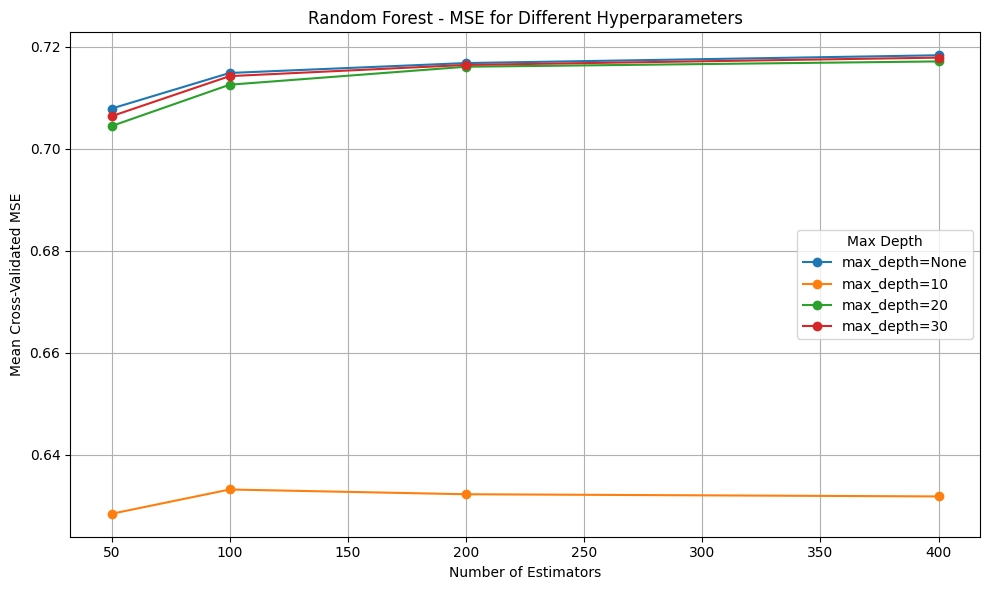

In [44]:
# Extract the results into a DataFrame
rf_results = pd.DataFrame(grid_search.cv_results_)

# Visualize the accuracy for different n_estimators
plt.figure(figsize=(10, 6))
for max_depth in param_grid['max_depth']:
    scores = []
    for n_estimators in param_grid['n_estimators']:
        # Filter results based on both max_depth and n_estimators
        score = [rf_results['mean_test_score'][i] for i in range(len(rf_results['params']))
                 if rf_results['params'][i]['max_depth'] == max_depth and
                    rf_results['params'][i]['n_estimators'] == n_estimators]
        # Append the mean score for each n_estimators value
        scores.append(score[0] if score else None)
    
    plt.plot(param_grid['n_estimators'], scores, marker='o', label=f'max_depth={max_depth}')

plt.title('Random Forest - MSE for Different Hyperparameters')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Cross-Validated MSE')
plt.legend(title='Max Depth')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
best_rf_model = grid_search.best_estimator_

start_time = time.time()

best_rf_model.fit(X_train, y_train)

end_time = time.time()

rf_y_pred = best_rf_model.predict(X_test)

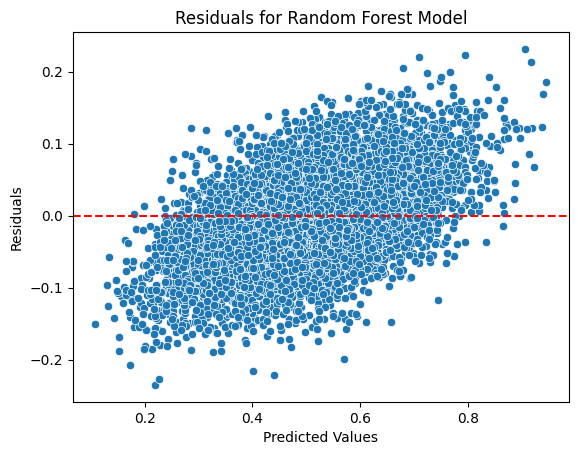

In [46]:
rf_residuals = y_test - rf_y_pred
sns.scatterplot(x=y_pred, y=rf_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title("Residuals for Random Forest Model")
plt.show()

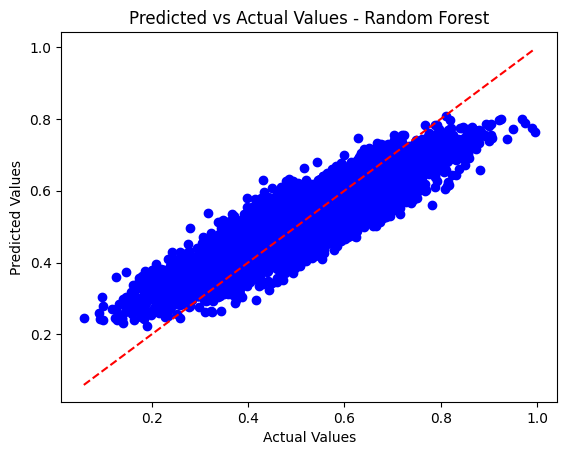

In [47]:
plt.scatter(y_test, rf_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Predicted vs Actual Values - Random Forest")
plt.show()

In [48]:
mse = mean_squared_error(y_test, rf_y_pred)
mae = mean_absolute_error(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)
train_time_rf = end_time - start_time

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f"Training Time: {train_time_rf}")

Mean Squared Error (MSE): 0.0038516787343547253
Mean Absolute Error (MAE): 0.049416653166015095
R-squared (R2): 0.7914218704314446
Training Time: 63.03792762756348


# **XGBoost**

In [49]:
import xgboost as xgb

param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [1, 3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 1.0],
    'min_child_weight': [1, 3]
}

In [50]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.7}


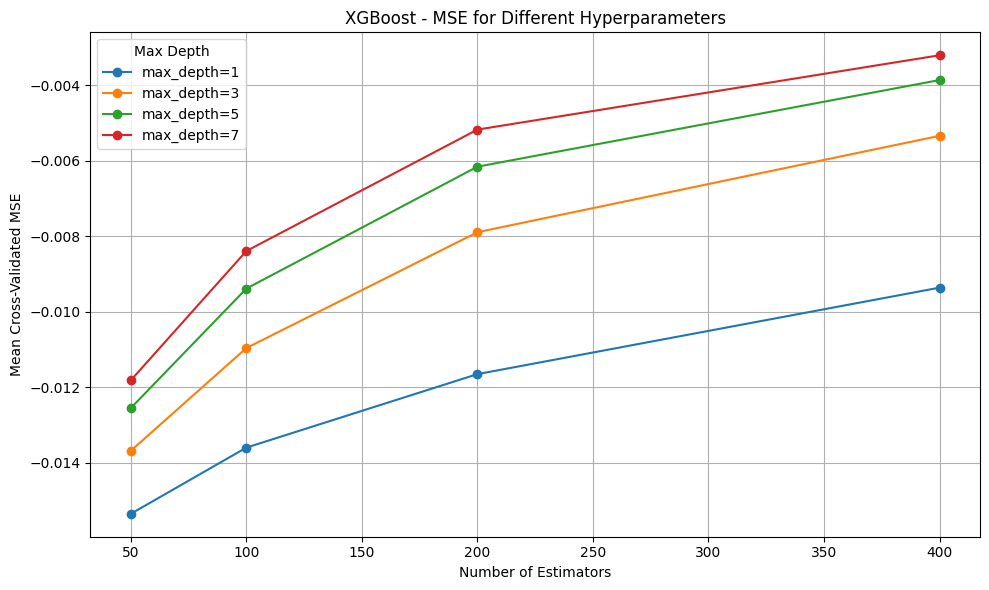

In [51]:
# Extract the results into a DataFrame
xg_results = pd.DataFrame(grid_search.cv_results_)

# Extracting relevant information for plotting
xg_results['MSE'] = -xg_results['mean_test_score']  # Convert negative MSE to positive MSE

# Visualize the accuracy for different n_estimators
plt.figure(figsize=(10, 6))

for max_depth in param_grid['max_depth']:
    scores = []
    for n_estimators in param_grid['n_estimators']:
        # Filter results based on both max_depth and n_estimators
        score = [xg_results['mean_test_score'][i] for i in range(len(xg_results['params']))
                 if xg_results['params'][i]['max_depth'] == max_depth and
                    xg_results['params'][i]['n_estimators'] == n_estimators]
        # Append the mean score for each n_estimators value
        scores.append(score[0] if score else None)
    
    plt.plot(param_grid['n_estimators'], scores, marker='o', label=f'max_depth={max_depth}')

plt.title('XGBoost - MSE for Different Hyperparameters')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Cross-Validated MSE')
plt.legend(title='Max Depth')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
best_xgb_reg = xgb.XGBRegressor(**best_params, objective='reg:squarederror')

start_time = time.time()

best_xgb_reg.fit(X_train, y_train)

end_time = time.time()

xg_y_pred = best_xgb_reg.predict(X_test)

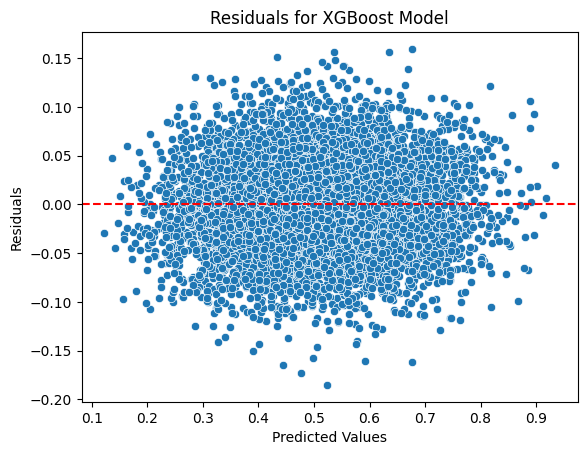

In [53]:
xg_residuals = y_test - xg_y_pred
sns.scatterplot(x=xg_y_pred, y=xg_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title("Residuals for XGBoost Model")
plt.show()

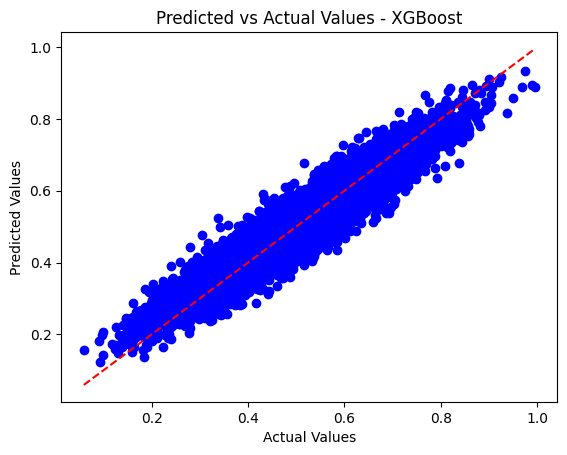

In [54]:
plt.scatter(y_test, xg_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Predicted vs Actual Values - XGBoost")
plt.show()

In [55]:
mse = mean_squared_error(y_test, xg_y_pred)
mae = mean_absolute_error(y_test, xg_y_pred)
r2 = r2_score(y_test, xg_y_pred)
train_time_xg = end_time - start_time

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Training Time: {train_time_xg}")

Mean Squared Error (MSE): 0.0020349680678075468
Mean Absolute Error (MAE): 0.03598890581455826
R-squared (R2): 0.8898013405092199
Training Time: 0.6732711791992188


# **Neural Network**

In [6]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from bayes_opt import BayesianOptimization
import time
import matplotlib.pyplot as plt
from skopt.space import Integer, Real

In [7]:
# Bayesian Optimization
pbounds = {
    'num_layers': (1, 8),
    'num_neurons': (4, 256),
    'learning_rate': (0.0001, 0.1),
    'batch_size': (32, 512),
    'dropout_rate': (0.0, 0.5)
}

In [8]:
# Function to create and train a neural network
def train_nn(num_layers, num_neurons, learning_rate, batch_size, dropout_rate):
    num_layers = int(num_layers)
    num_neurons = int(num_neurons)
    batch_size = int(batch_size)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(shape=(X_train.shape[1],)))
    for _ in range(int(num_layers)):
        model.add(tf.keras.layers.Dense(int(num_neurons), activation='relu'))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mse')
    
    model.fit(X_train, y_train, epochs=50, batch_size=int(batch_size), validation_data=(X_valid, y_valid), verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return -mse  # Negative because BayesianOptimization maximizes

In [9]:
optimizer = BayesianOptimization(
    f=train_nn,
    pbounds=pbounds,
    random_state=42
)

In [10]:
# Perform Bayesian optimization with 25 iterations
optimizer.maximize(init_points=5, n_iter=25)

|   iter    |  target   | batch_... | dropou... | learni... | num_la... | num_ne... |
-------------------------------------------------------------------------------------
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
| 1         | -0.01847  | 211.8     | 0.4754    | 0.07323   | 5.191     | 43.32     |
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
| 2         | -0.2583   | 106.9     | 0.02904   | 0.08663   | 5.208     | 182.4     |
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
| 3         | -0.01855  | 41.88     | 0.485     | 0.08326   | 2.486     | 49.82     |
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
| 4         | -0.01039  | 120.0     | 0.1521    | 0.05252   | 4.024     | 77.39     |
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
| 5         | -0.2788   | 325.7     | 0.06975   | 0.02929   | 3.565     | 118.9     |
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
| 6         | -0.006116 | 120.2     | 0.2557    | 0.009417  | 7.446     | 90.68     |
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
| 7        

In [11]:
# Extracting results
mse_values = [-res['target'] for res in optimizer.res]

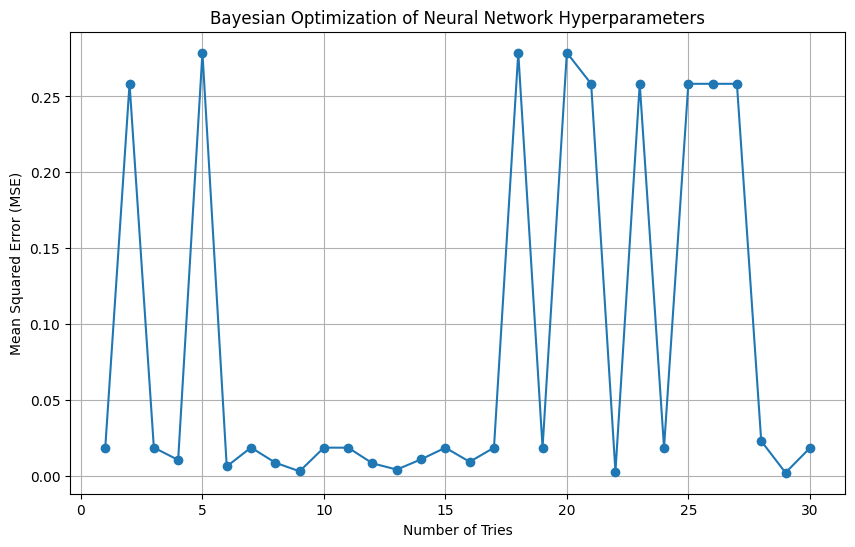

In [12]:
# Plot MSE for each iteration
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o')
plt.xlabel('Number of Tries')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Bayesian Optimization of Neural Network Hyperparameters')
plt.grid()
plt.show()

In [13]:
best_params = optimizer.max['params']
print(best_params)

{'batch_size': 511.81492317750616, 'dropout_rate': 0.41273599392794413, 'learning_rate': 0.006147251672908667, 'num_layers': 1.8874482413482476, 'num_neurons': 53.76269312409511}


In [14]:
# Training the final model with optimal hyperparameters
num_layers = int(best_params['num_layers'])
num_neurons = int(best_params['num_neurons'])
learning_rate = best_params['learning_rate']
batch_size = int(best_params['batch_size'])
dropout_rate = best_params['dropout_rate']

In [15]:
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.InputLayer(shape=(X_train.shape[1],)))
for _ in range(num_layers):
    final_model.add(tf.keras.layers.Dense(num_neurons, activation='relu'))
    final_model.add(tf.keras.layers.Dropout(dropout_rate))
final_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                    loss='mse',
                    metrics=['mse'])

start_time = time.time()
history = final_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose=1)
training_time = time.time() - start_time

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - mse: 

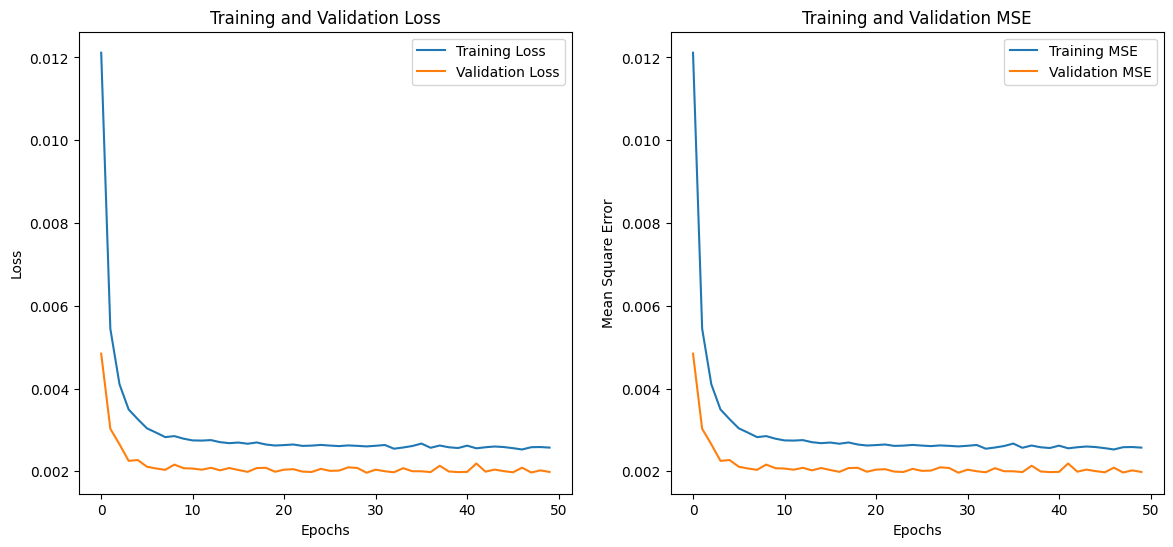

In [16]:
# Plot training loss and accuracy
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.legend()
plt.title('Training and Validation MSE')

plt.show()

In [17]:
# Make predictions with the final model
y_pred_nn = final_model.predict(X_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


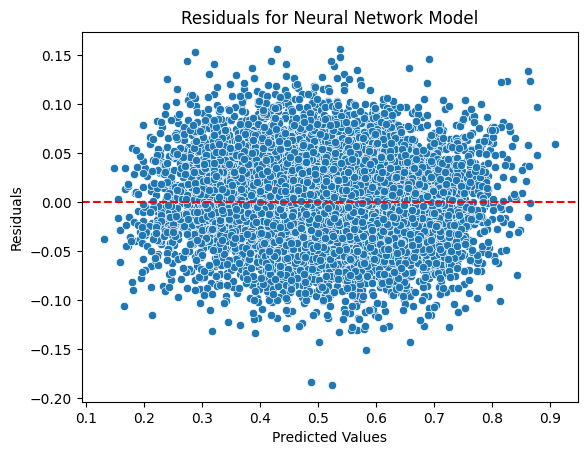

In [18]:
nn_residuals = y_test - y_pred_nn.flatten()
sns.scatterplot(x=y_pred_nn.flatten(), y=nn_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title("Residuals for Neural Network Model")
plt.show()

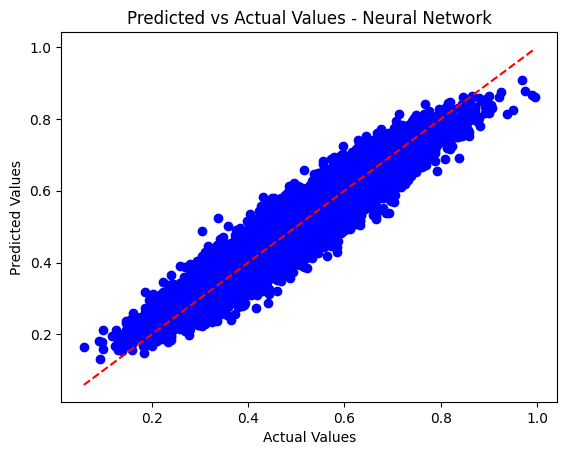

In [19]:
plt.scatter(y_test, y_pred_nn, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Predicted vs Actual Values - Neural Network")
plt.show()

In [20]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_nn)
mae = mean_absolute_error(y_test, y_pred_nn)
r2 = r2_score(y_test, y_pred_nn)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")
print(f"Training Time: {training_time} seconds")


Mean Squared Error (MSE): 0.001957818802578989
Mean Absolute Error (MAE): 0.035272740808352826
R^2 Score: 0.8939791680355483
Training Time: 7.43702244758606 seconds


# DeepGBM

In [71]:
# Import Required Libraries
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [72]:
# Create dataset for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)

# LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'force_row_wise': True
}

# Train LightGBM model
lgb_model = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 4638
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 59
[LightGBM] [Info] Start training from score 0.509171


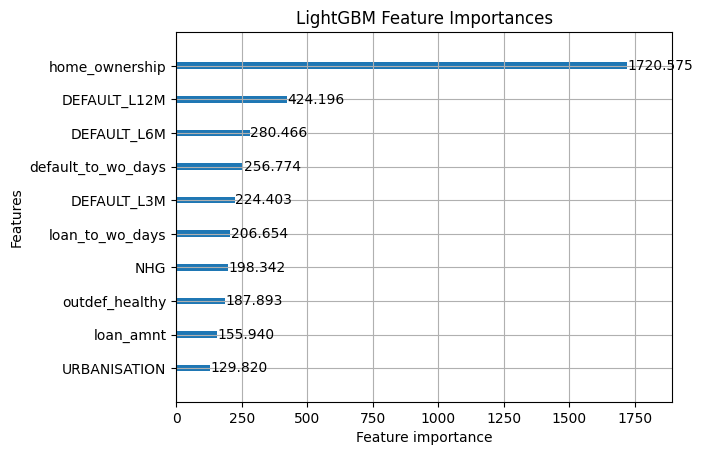

In [73]:
# LightGBM Feature Importance Visualization
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='gain')
plt.title('LightGBM Feature Importances')
plt.show()

In [74]:
# Extract predictions for training the deep network
lgb_train_preds = lgb_model.predict(X_train)
lgb_test_preds = lgb_model.predict(X_test)

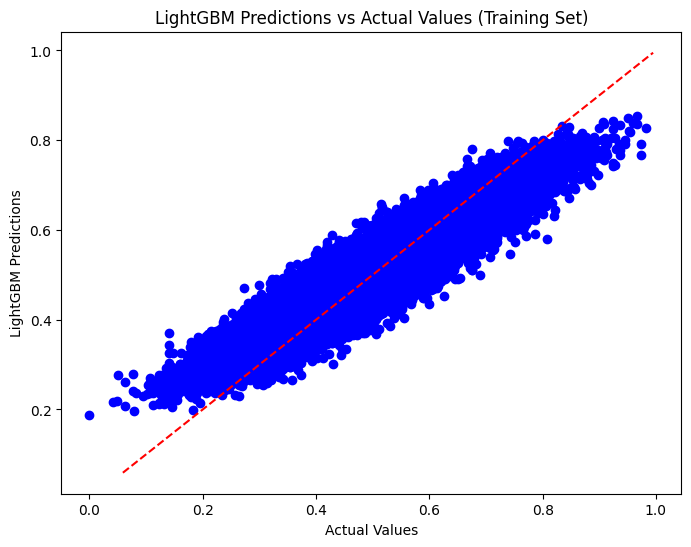

In [75]:
# Plot LightGBM Predictions vs Actual Values
plt.figure(figsize=(8, 6))
#sns.scatterplot(x=y_train, y=lgb_train_preds, alpha=0.5)
plt.scatter(y_train, lgb_train_preds, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('LightGBM Predictions')
plt.title('LightGBM Predictions vs Actual Values (Training Set)')
plt.show()

In [76]:
# Concatenate original features and LightGBM predictions
X_train_combined = np.concatenate([X_train, lgb_train_preds.reshape(-1, 1)], axis=1)
X_test_combined = np.concatenate([X_test, lgb_test_preds.reshape(-1, 1)], axis=1)

In [77]:
class DeepGBMNet(nn.Module):
    def __init__(self, input_size):
        super(DeepGBMNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Set input size to be the number of features plus one (the LightGBM output)
input_size = X_train_combined.shape[1]
model = DeepGBMNet(input_size)

In [78]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_combined)
y_train_tensor = torch.FloatTensor(y_train)

# Create DataLoader
dataset = TensorDataset(X_train_tensor, y_train_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [79]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

training_losses = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    for batch_X, batch_y in loader:
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Save the loss for each epoch
    training_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.0025
Epoch [20/50], Loss: 0.0026
Epoch [30/50], Loss: 0.0026
Epoch [40/50], Loss: 0.0020
Epoch [50/50], Loss: 0.0013


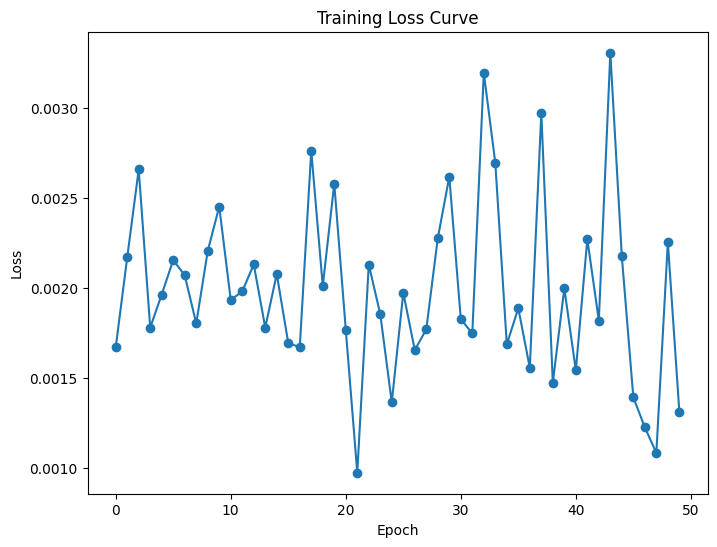

In [80]:
# Plot Training Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(range(num_epochs), training_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

In [81]:
# Convert test set to PyTorch tensor
X_test_tensor = torch.FloatTensor(X_test_combined)

# Convert the y_test values to a tensor
y_test_tensor = torch.FloatTensor(y_test.values)

# Get model predictions
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).squeeze()

# Make sure y_pred is also converted to a NumPy array for metric calculation
y_pred_np = y_pred.detach().numpy()

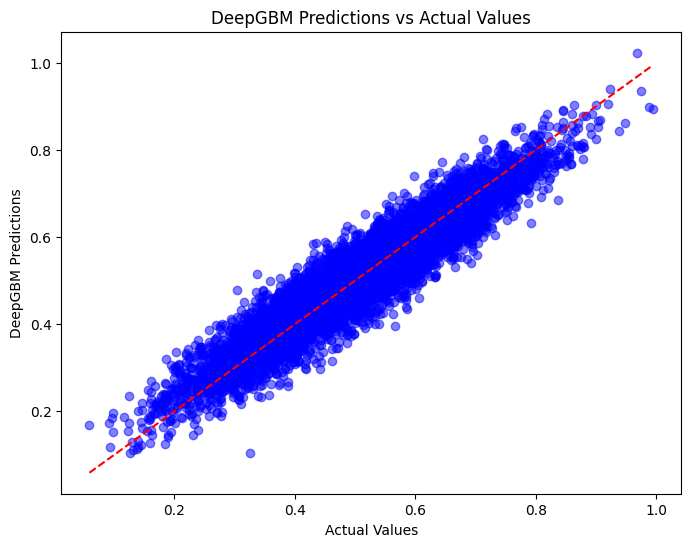

In [82]:
# Plot Predictions vs Actual Values
plt.figure(figsize=(8, 6))
#sns.scatterplot(x=y_test, y=y_pred_np, alpha=0.5)
plt.scatter(y_test, y_pred_np, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('DeepGBM Predictions')
plt.title('DeepGBM Predictions vs Actual Values')
plt.show()

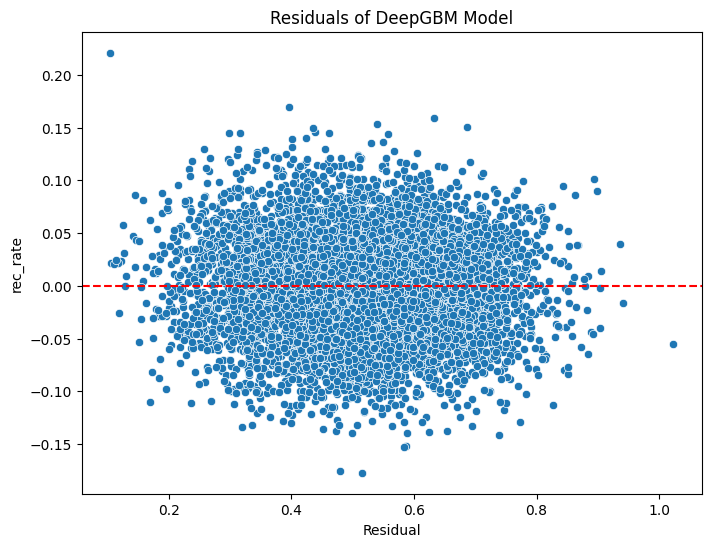

In [83]:
# Visualize Model Residuals
residuals = y_test - y_pred_np

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_np, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Residual')
plt.title('Residuals of DeepGBM Model')
plt.show()

In [84]:
# Calculate RMSE using scikit-learn
mse = mean_squared_error(y_test, y_pred_np)
mae = mean_absolute_error(y_test, y_pred_np)
r2 = r2_score(y_test, y_pred_np)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.0020790239734375326
Mean Absolute Error (MAE): 0.03637789736586809
R^2 Score: 0.8874156019711664
